## Nome: Flávio Bezerra Pereira

# Manipulando dados com Pandas - Lista de Exercícios

Depois de estudarmos os fundamentos da linguagem Python chegou a hora de explorarmos uma das bibliotecas mais poderosas para análise de dados, o Pandas.

De acordo com o próprio criador dessa biblioteca, Wes McKinney, o nome Pandas é derivado de panel data (**dados em painel**), um termo de econometria para conjuntos de dados estruturados. O surgimento da biblioteca, no início de 2008, começou devido a insatisfação de McKinney de obter uma __ferramenta de processamento de dados de alto desempenho__, com recursos flexíveis de manipulação de planilhas e de banco de dados relacionais.

![PandaUrl](https://media.giphy.com/media/HDR31jsQUPqQo/giphy.gif "panda")

Mais informações sobre o Pandas em Português [aqui](https://harve.com.br/blog/programacao-python-blog/pandas-python-vantagens-e-como-comecar/).

## Nesta lista abordaremos os seguintes tópicos

* Download e extração de uma base de dados a partir de uma URL
* Leitura de um arquivo .csv
* Verificações básicas quanto à estrutura da nossa base
    * quantidade de linhas e colunas
    * tipo de cada coluna
    * quantidade de dados faltantes por coluna/linha
* Processamento básico
    * remoção de valores faltantes
    * conversão de tipo de uma coluna
    * substituição de strings
* Criação de uma série (pandas.Series) a partir de um DataFrame (pandas.DataFrame)
* Diferenças entre .loc e .iloc
* Plotar uma série temporal

-------

#### Bons Estudos!

*Qualquer dúvida não deixe de procurar os monitores nos fóruns!*

--------
--------

## 0 - Download e extração de uma base de dados a partir de uma URL

Nesta lista utilizaremos uma base de dados real relacionada ao avanço da COVID-19 no Brasil, mais especificamente aos boletins informativos e casos do coronavírus por município por dia.

Esta base é atualizada diariamente a partir dos dados das Secretarias de Saúde estaduais e está disponível através do [link](https://brasil.io/dataset/covid19/boletim/).

Dentro do ambiente do Google Colab podemos usar dois comandos (*wget* e *gzip*) de bash Linux para baixar o arquivo compactado e extrair a base em CSV.

In [ ]:
! wget 'https://data.brasil.io/dataset/covid19/caso.csv.gz'
! gzip -d caso.csv.gz

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 1 - Leitura de uma base em csv com Pandas

Substitua a tag `# SEU CÓDIGO AQUI #` pelo comando necessário para cumprir a tarefa.

Se a leitura for bem sucedida o output exibirá as cinco primeiras linhas da tabela. 

In [2]:
df = pd.read_csv("caso.csv.gz",compression='gzip')
df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-01-27,AP,NaN,state,147215,2045,675,True,845731.0,861773.0,16.0,17082.80487,0.0139
1,2022-01-26,AP,NaN,state,145141,2043,674,False,845731.0,861773.0,16.0,16842.13824,0.0141
2,2022-01-25,AP,NaN,state,143037,2041,673,False,845731.0,861773.0,16.0,16597.99042,0.0143
3,2022-01-24,AP,NaN,state,140462,2039,672,False,845731.0,861773.0,16.0,16299.18784,0.0145
4,2022-01-23,AP,NaN,state,136561,2036,671,False,845731.0,861773.0,16.0,15846.51643,0.0149


## 2 - Verificações básicas quanto à estrutura da tabela

- quantidade de linhas e colunas
- tipo de cada coluna
- quantidade de dados faltantes por coluna

In [3]:
# Exiba o número total de linhas e colunas de df
print("Total de linhas: ", len(df.index))
print("Total de colunas: ", len(df.columns))

Total de linhas:  2769647
Total de colunas:  13


In [4]:
# Exiba o tipo de cada coluna
df.dtypes

date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
order_for_place                     int64
is_last                              bool
estimated_population_2019         float64
estimated_population              float64
city_ibge_code                    float64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

In [5]:
''' 
Exiba o total de dados faltantes para cada coluna no seguinte formato:
    A coluna date possui xxx linhas em branco.
    A coluna state não possui linhas em branco.
    A coluna city possui yyy linhas em branco.
    ...
'''
for idx, value in df.isna().sum().iteritems():
    if value > 0:
        print("A coluna ",idx," possui ", value," linhas em branco.")
    else:
        print("A coluna ",idx," não possui linhas em branco.")

A coluna  date  não possui linhas em branco.
A coluna  state  não possui linhas em branco.
A coluna  city  possui  18209  linhas em branco.
A coluna  place_type  não possui linhas em branco.
A coluna  confirmed  não possui linhas em branco.
A coluna  deaths  não possui linhas em branco.
A coluna  order_for_place  não possui linhas em branco.
A coluna  is_last  não possui linhas em branco.
A coluna  estimated_population_2019  possui  10142  linhas em branco.
A coluna  estimated_population  possui  10142  linhas em branco.
A coluna  city_ibge_code  possui  10142  linhas em branco.
A coluna  confirmed_per_100k_inhabitants  possui  24232  linhas em branco.
A coluna  death_rate  não possui linhas em branco.


### 3 - Processamento básico
* remoção de valores faltantes
* conversão de tipo de uma coluna
* substituição de strings 

#### Material suplementar

[Formatos de data e tempo](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [6]:
''' 
Remova todas as linhas em que o campo cidade (`city`) esteja em branco (NaN).
Faça tal remoção de tal forma a alterar o próprio dataframe sem atribuir 
o resultado a uma nova variável

Obs: No caso desse conjunto de dados, como removemos todas as linhas sem a 
informação de cidade deveríamos ficar apenas com as informações de cidade e não
estado de acordo com a variável `place_type`. 
Você sabe verificar rapidamente se esta frase está correta? Mostre o código em
outra célula.
'''
df = df.dropna(subset=['city'])

In [7]:
print(df['place_type'].value_counts()) # informacao correta temos apenas city

city    2751438
Name: place_type, dtype: int64


In [8]:
'''
Converta a coluna `date` de string (Objetct) para datetime

Obs: Mostre que a conversão de tipo foi bem sucedida em outra célula.
'''
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [9]:
df.dtypes

date                              datetime64[ns]
state                                     object
city                                      object
place_type                                object
confirmed                                  int64
deaths                                     int64
order_for_place                            int64
is_last                                     bool
estimated_population_2019                float64
estimated_population                     float64
city_ibge_code                           float64
confirmed_per_100k_inhabitants           float64
death_rate                               float64
dtype: object

In [10]:
'''
Substitua todas as referências a "city" na coluna `place_type` por "cidade"

Obs: Mostre que a substituição foi bem sucedida em outra célula.
'''
df['place_type'] = 'cidade'

In [11]:
print(df['place_type'].value_counts()) # substituicao bem sucedida

cidade    2751438
Name: place_type, dtype: int64


## 4 - Criação de uma série a partir de um DataFrame

No Pandas uma série é uma estrutura de dados unidimencional que apresenta para cada índice um valor. Uma série é muito similar à estrutura de um dicionário, porém com mais flexibilidade para manipular e editar seus dados.

In [12]:
'''
Crie uma série chamada `casos_sp` que contenha todos os casos confirmados 
(coluna `confirmed`) da cidade de São Paulo-SP indexados no tempo (coluna `date`).

Exiba um print dos primeiros 10 dias da série.

Obs: Mostre o tipo da variável `casos_sp` em outra célula.
'''
df_sao_paulo = df.loc[(df['city'] == 'São Paulo') & (df['state'] == 'SP')] # cidade de São Paulo-SP
casos_sp = df_sao_paulo.set_index('date')['confirmed'] # indexando pela data a coluna confirmados
casos_sp.tail(10)

date
2020-03-05    6
2020-03-04    3
2020-03-03    2
2020-03-02    2
2020-03-01    2
2020-02-29    2
2020-02-28    2
2020-02-27    1
2020-02-26    1
2020-02-25    1
Name: confirmed, dtype: int64

In [13]:
type(casos_sp) # tipo da variavel

pandas.core.series.Series

## 5 - Acessando dados com .loc e .iloc

Muitas vezes queremos inspecionar uma linha ou um conjunto de linhas do nosso dataframe ou series, para esse tipo de query o Pandas conta com duas formas de buscar por indexação, uma baseada no index (.loc) e outra baseada na posição "física" (.iloc).

`.loc` - é uma busca baseada no index seja ele um inteiro, uma string, uma data ou qualquer outro tipo de dado utilizado para indexar o dataframe ou series.

`.iloc`- é uma busca baseada no índice númerico da linha ou conjunto de linhas que desejamos acessar, ou seja, só aceita números inteiros ou intervalos de inteiros (ex: .iloc[15:30]).


#### Material suplementar

Caso a série retorne vazia, veja como resolver este problema no [StackOverflow](https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates).

In [14]:
'''
Exiba em tela o número de mortes por COVID na cidade de Macaé-RJ entre os dias 
04/04/2021 e 11/04/2021.

Obs: utilize .loc ou .iloc e justifique a escolha.
'''
df_macae = df.loc[(df['city'] == 'Macaé') & (df['state'] == 'RJ')] # cidade de Macaé-RJ
df_macae = df_macae.loc[(df_macae['date'] >= '2021-4-4') & (df_macae['date'] <= '2021-4-11')]
df_macae.sort_index(inplace=True, ascending=True)
print("Número de mortes no período entre dos dias: ", df_macae.iloc[0]['deaths']-df_macae.iloc[-1]['deaths'])

# loc utilizado para fitrar os dados do data frame principal baseados no index de city, state e date
# iloc utilizado no final para calcular o numero de mortes baseado no indice numero primeiro-ultimo

Número de mortes no período entre dos dias:  35


In [15]:
'''
Exiba em tela o número de mortes por COVID na cidade de Macaé-RJ no último dia
disponível na base.

Obs: utilize .loc ou .iloc e justifique a escolha.
'''
df_macae = df.loc[(df['city'] == 'Macaé') & (df['state'] == 'RJ')] # cidade de Macaé-RJ
df_macae.sort_index(inplace=True, ascending=True)
print("Número de mortes no último dia disponível na base: ", df_macae.iloc[0]['deaths']-df_macae.iloc[1]['deaths'])

# loc utilizado para fitrar os dados do data frame principal baseados no index de city, state e date
# iloc utilizado no final para calcular a diferenca no numero de mortes acumulado entre o ultimo e o penultimo disponivel

Número de mortes no último dia disponível na base:  13


## 6 - Plotar uma série temporal

Nestes exercícios usaremos a função plot do Pandas que usa por trás a biblioteca matplotlib. 

Para exibirmos em tela os gráficos devemos usar o comando mágico `%matplotlib inline` em alguma célula do notebook, preferencialmente depois dos imports.

Mais informações sobre os comandos mágicos no [link](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

<AxesSubplot:xlabel='Data'>

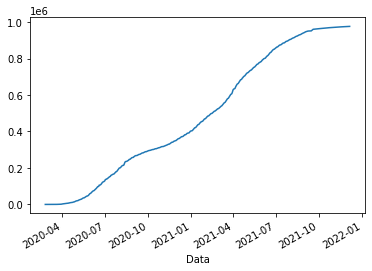

In [16]:
'''
Plot a série de novos casos por dia na cidade de São Paulo desde o início da pandemia até a
data mais recente.

Obs: use a série criada no exercício anterior `casos_sp`
'''
casos_sp.sort_index(ascending=True, inplace=True)
casos_sp.index.name = 'Data'
%matplotlib inline
casos_sp.plot()

<AxesSubplot:xlabel='Data'>

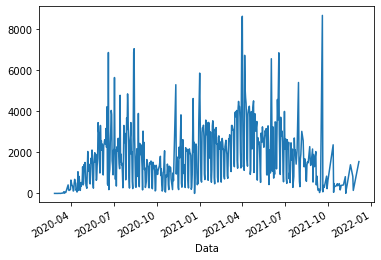

In [17]:
# como a coluna de casos confirmados e acumulativa a serie abaixo extrai a diferenca entre o dia atual com o anterior 
# para verificar a variacao diaria de casos
casos_sp_dia = pd.Series(np.ediff1d(casos_sp.sort_index(), to_begin=casos_sp.sort_index()[0]), index=casos_sp.sort_index().index)
casos_sp_dia.index.name = 'Data'
casos_sp_dia.plot()

Se o exercício foi executado corretamente um gráfico de novos casos (eixo-y) no tempo (eixo-x) foi plotado. Note que o eixo-y está em notação científica e sem um rótulo, o que dificulta a leitura.

É possível usar comandos do matplotlib para alterar um gráfico produzido pelo Pandas, como veremos a seguir.

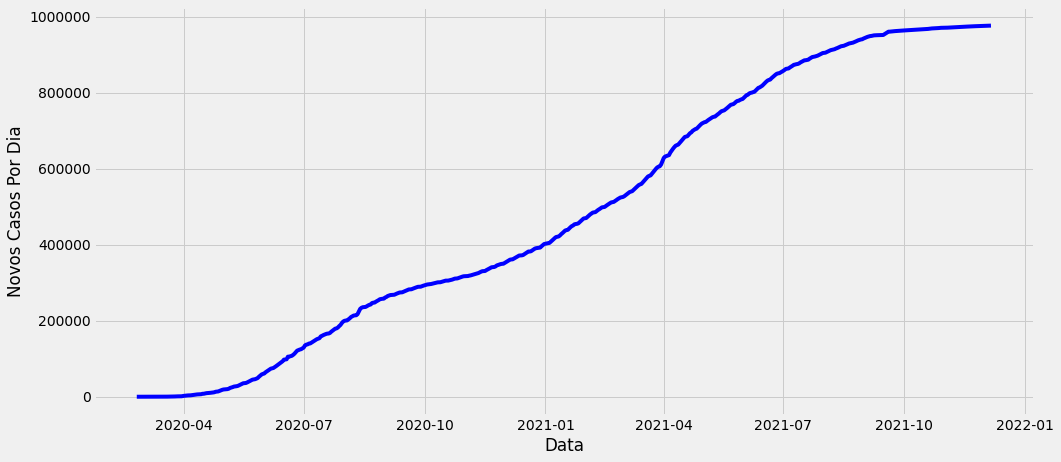

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('Novos Casos Por Dia')
ax.set_xlabel('Data')
plt.plot(casos_sp,'b')

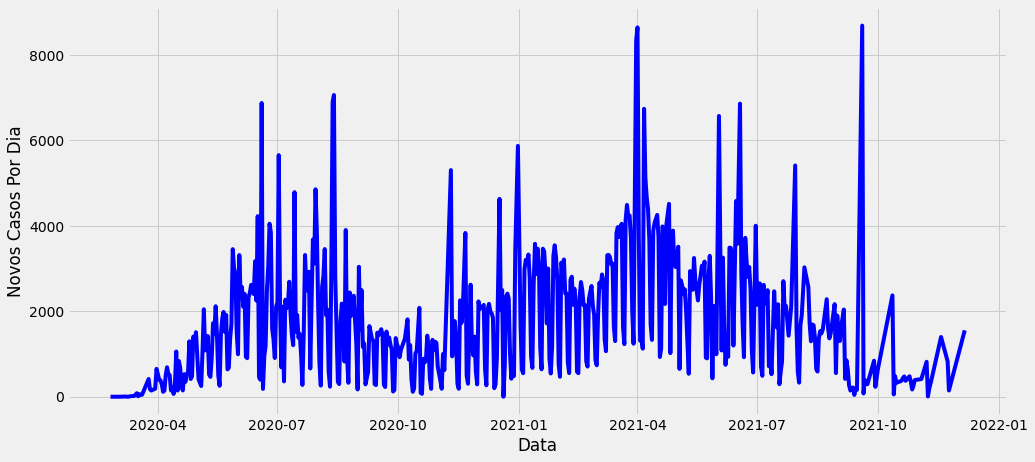

In [20]:
# como a coluna de casos confirmados e acumulativa a serie abaixo extrai a diferenca entre o dia atual com o anterior 
# para verificar a variacao diaria de casos
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('Novos Casos Por Dia')
ax.set_xlabel('Data')
plt.plot(casos_sp_dia,'b')
plt.show()